In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2023-02-24 07:21:09--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-02-24 07:21:09--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M   197MB/s    in 3.8s    

2023-02-24 07:21:13 (196 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2023-02-24 07:21:13--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar

In [ ]:
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

In [ ]:
import os
images_dir='/content/images'
targets_dir='/content/annotations/trimaps'

In [ ]:
os.path.join(images_dir, os.listdir(images_dir)[0])


'/content/images/havanese_90.jpg'

In [ ]:
os.path.join(targets_dir, os.listdir(targets_dir)[0])

'/content/annotations/trimaps/._beagle_25.png'

In [ ]:
imgs_path = []
for img_path in sorted(os.listdir(images_dir)):
    if not img_path.startswith('.') and img_path.endswith('.jpg'):
        full_path = os.path.join(images_dir, img_path)
        imgs_path.append(full_path)

targets_path = []
for target_path in sorted(os.listdir(targets_dir)):
    if not target_path.startswith('.') and target_path.endswith('.png'):
        full_path = os.path.join(targets_dir, target_path)
        targets_path.append(full_path)


In [ ]:
print(len(imgs_path), len(targets_path))

7390 7390


In [ ]:
for i in range(10):
    print(imgs_path[i], targets_path[i])

/content/images/Abyssinian_1.jpg /content/annotations/trimaps/Abyssinian_1.png
/content/images/Abyssinian_10.jpg /content/annotations/trimaps/Abyssinian_10.png
/content/images/Abyssinian_100.jpg /content/annotations/trimaps/Abyssinian_100.png
/content/images/Abyssinian_101.jpg /content/annotations/trimaps/Abyssinian_101.png
/content/images/Abyssinian_102.jpg /content/annotations/trimaps/Abyssinian_102.png
/content/images/Abyssinian_103.jpg /content/annotations/trimaps/Abyssinian_103.png
/content/images/Abyssinian_104.jpg /content/annotations/trimaps/Abyssinian_104.png
/content/images/Abyssinian_105.jpg /content/annotations/trimaps/Abyssinian_105.png
/content/images/Abyssinian_106.jpg /content/annotations/trimaps/Abyssinian_106.png
/content/images/Abyssinian_107.jpg /content/annotations/trimaps/Abyssinian_107.png


In [ ]:
from IPython.display import Image, display

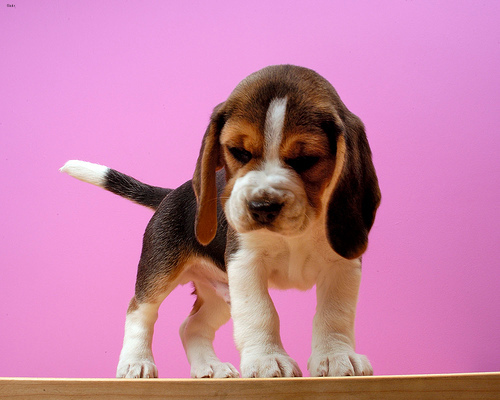

In [ ]:
display(Image(imgs_path[3000]))

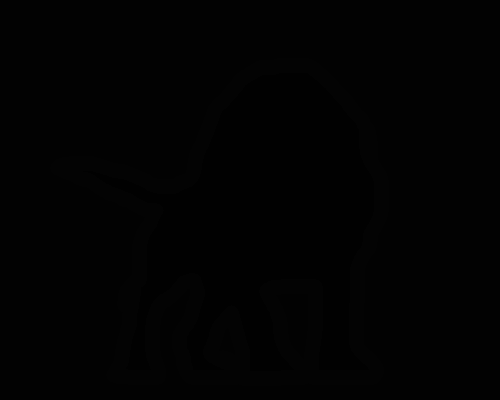

In [ ]:
display(Image(targets_path[3000]))

In [ ]:
import cv2
data = cv2.imread(targets_path[3000])

In [ ]:
import numpy as np
np.min(data), np.max(data)

(1, 3)

In [ ]:
from PIL import ImageOps

In [ ]:
from tensorflow.keras.utils import load_img

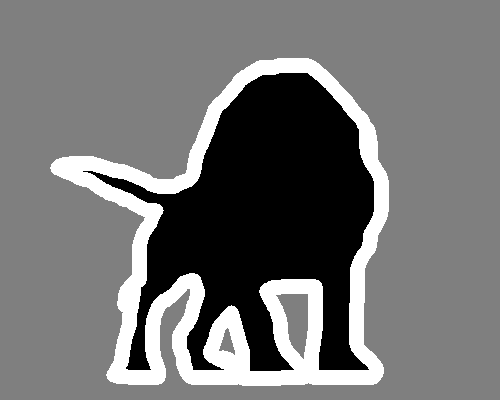

In [ ]:
display(ImageOps.autocontrast(load_img(targets_path[3000])))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D(2))

model.add(UpSampling2D(2))
model.add(Conv2D(16, (3,3), padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(16, (3,3), padding='same'))
model.add(UpSampling2D(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                        

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1)))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D(2))

model.add(UpSampling2D(2))
model.add(Conv2DTranspose(16, (3,3)))
model.add(UpSampling2D(2))
model.add(Conv2DTranspose(16, (3,3)))
model.add(Conv2DTranspose(3, (3,3)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 up_sampling2d_3 (UpSampling  (None, 10, 10, 16)      

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
img_size=(128,128)
imgs, targets = [], []
for img_path, target_path in zip(imgs_path, targets_path):
    loaded_img = load_img(img_path, target_size=img_size)
    imgs.append(img_to_array(loaded_img))
    loaded_annt = load_img(target_path, target_size=img_size, color_mode='grayscale')
    annt_array = img_to_array(loaded_annt)
    annt_array -= 1
    targets.append(annt_array)


In [ ]:
imgs, targets = np.asarray(imgs), np.asarray(targets)

In [ ]:
len(imgs), len(targets)

(7390, 7390)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imgs, targets, train_size=0.7)
x_train, x_test, y_train, y_test = np.asarray(x_train), np.asarray(x_test), np.asarray(y_train), np.asarray(y_test)

In [ ]:
len(x_train), len(y_train)

(5173, 5173)

In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(UpSampling2D(2))
model.add(Conv2DTranspose(128, 3, activation='relu'))
model.add(Conv2DTranspose(128, 3, activation='relu'))
model.add(UpSampling2D(2))
model.add(Conv2DTranspose(64, 3, activation='relu'))
model.add(Conv2DTranspose(64, 3, activation='relu'))
model.add(UpSampling2D(2))
model.add(Conv2DTranspose(32, 3, activation='relu'))
model.add(Conv2DTranspose(32, 3, activation='relu'))
model.add(UpSampling2D(2))
model.add(Conv2DTranspose(16, 3, activation='relu'))
model.add(Conv2DTranspose(16, 3, activation='relu'))
model.add(Conv2DTranspose(16, 3, activation='relu'))
model.add(Conv2DTranspose(3, 3, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                    

In [ ]:
model = Sequential()

for r in [16, 32, 64, 128]:
    model.add(Conv2D(r, 3))
    model.add(Conv2D(r, 3))
    model.add(MaxPooling2D(2))

for r in [128, 64, 32, 16]:
    model.add(UpSampling2D(2))
    model.add(Conv2DTranspose(r, 3))
    model.add(Conv2DTranspose(r, 3))


model.add(Conv2D(16, 3, input_shape=(128,128,3)))




In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(x_train, y_train, validation_split=0.7, epochs=10, batch_size=32)

Epoch 1/10
49/49 [==============================] - 17s 177ms/step - loss: 0.9589 - accuracy: 0.6676 - val_loss: 0.8163 - val_accuracy: 0.6954
Epoch 2/10
49/49 [==============================] - 8s 171ms/step - loss: 0.7904 - accuracy: 0.6981 - val_loss: 0.7970 - val_accuracy: 0.6983
Epoch 3/10
49/49 [==============================] - 6s 115ms/step - loss: 0.7691 - accuracy: 0.7013 - val_loss: 0.7896 - val_accuracy: 0.7006
Epoch 4/10
49/49 [==============================] - 6s 116ms/step - loss: 0.7410 - accuracy: 0.7126 - val_loss: 0.7064 - val_accuracy: 0.7262
Epoch 5/10
49/49 [==============================] - 6s 117ms/step - loss: 0.7031 - accuracy: 0.7276 - val_loss: 0.6979 - val_accuracy: 0.7221
Epoch 6/10
49/49 [==============================] - 6s 115ms/step - loss: 0.6689 - accuracy: 0.7387 - val_loss: 0.7052 - val_accuracy: 0.7358
Epoch 7/10
49/49 [==============================] - 5s 112ms/step - loss: 0.6547 - accuracy: 0.7453 - val_loss: 0.6391 - val_accuracy: 0.7538
Epoch

In [ ]:
524288*3

1572864

In [ ]:
128*128*32

524288

In [ ]:
np.shape(y_train)

(5173, 128, 128, 3)

In [ ]:
np.shape(y_train[0])

(128, 128, 3)

In [ ]:
y_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
pred = model.predict(np.expand_dims(x_test[19], axis=0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

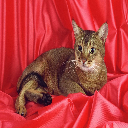

In [ ]:
display(array_to_img(x_test[19]))

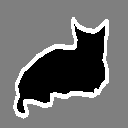

In [ ]:
display(array_to_img(y_test[19]))

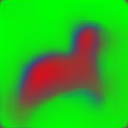

In [ ]:
display(array_to_img(pred[0]))